# API Env for Reinforcement Learning


This notebook runs some experiments of several Reinforcement Learning algorithms in a builded API Env based on Gymnasium library.

For each algorithm it is possible to configure some State Rewards and Action Penalties dictionary. These data refer to the reward of each possible state and to a penalty related to each action, respectively.

Therefore, it is possible to configure a specific set of values for each algorithm and test/compare the results.


In [1]:
# Uncomment and run the lines above for Google Colab notebooks
# !git clone https://:@github.com/arturossouza/API-Env.git
# %cd API-Env
# !pip install -r requirements.txt

In [2]:
from src.apienv import APIEnv

In [3]:
state_rewards = {
    "availability": {"Available": 5, "Offline": -40},
    "response_speed": {"Fast": 7, "Medium": -2, "Slow": -5},
    "health": {"Healthy": 5, "Error": -10, "Overloaded": -8},
    "request_capacity": {"Low": -5, "Medium": -1, "High": 2},
}

actions_penalties = {
    "Increase_CPU": -120,
    "Increase_CPU_Slightly": -20,
    "Decrease_CPU": 3,
    "Decrease_CPU_Slightly": 2,
    "Corrective_Maintenance": -7,
    "Preventive_Maintenance": -3,
    "Restart_Components": -4,
    "Update_Version": -6,
    "Rollback_Version": -16,
    "Add_Memory": -95,
    "Remove_Memory": -2,
}

In [4]:
env = APIEnv(
    state_rewards=state_rewards,
    actions_penalties=actions_penalties,
)

## Dynamic Programming


In [5]:
from src.algorithms.dynamic_programming.policy_evaluation import policy_improvement
from src.algorithms.dynamic_programming.value_iteration import value_iteration
from src.algorithms.dynamic_programming.utils import (
    plot_action_state_history,
    plot_total_rewards,
    run_policy,
)

### Value Iteration


In [6]:
env.reset()

(7, {})

Executando Value Iteration...
Episódio 10: delta = 6.586148313000024
Episódio 20: delta = 2.2964479200440735
Episódio 30: delta = 0.8007218785318742
Episódio 40: delta = 0.2791944555604573
Episódio 50: delta = 0.09734908724939828
Episódio 60: delta = 0.03394352788728838
Episódio 70: delta = 0.011835376355236349
Episódio 80: delta = 0.004126740565567388
Episódio 90: delta = 0.001438905463089668
Episódio 100: delta = 0.0005017153123390017
Episódio 110: delta = 0.00017493731249373923
Episódio 120: delta = 6.0996869279961174e-05
Episódio 130: delta = 2.1268293210141564e-05
Episódio 140: delta = 7.4157953235953755e-06
Episódio 150: delta = 2.585727969517393e-06
Episódio 160: delta = 9.015876116791333e-07
Episode 1/100
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=6, Reward=3, Next State=37
Current API state: Offline_Fast_Healthy_High
Step 2: State=37, Action=2, Reward=-23, Next State=20
Current API state: Offline_Fast_Healthy_High
Step 3: State=20, Action=10, Re

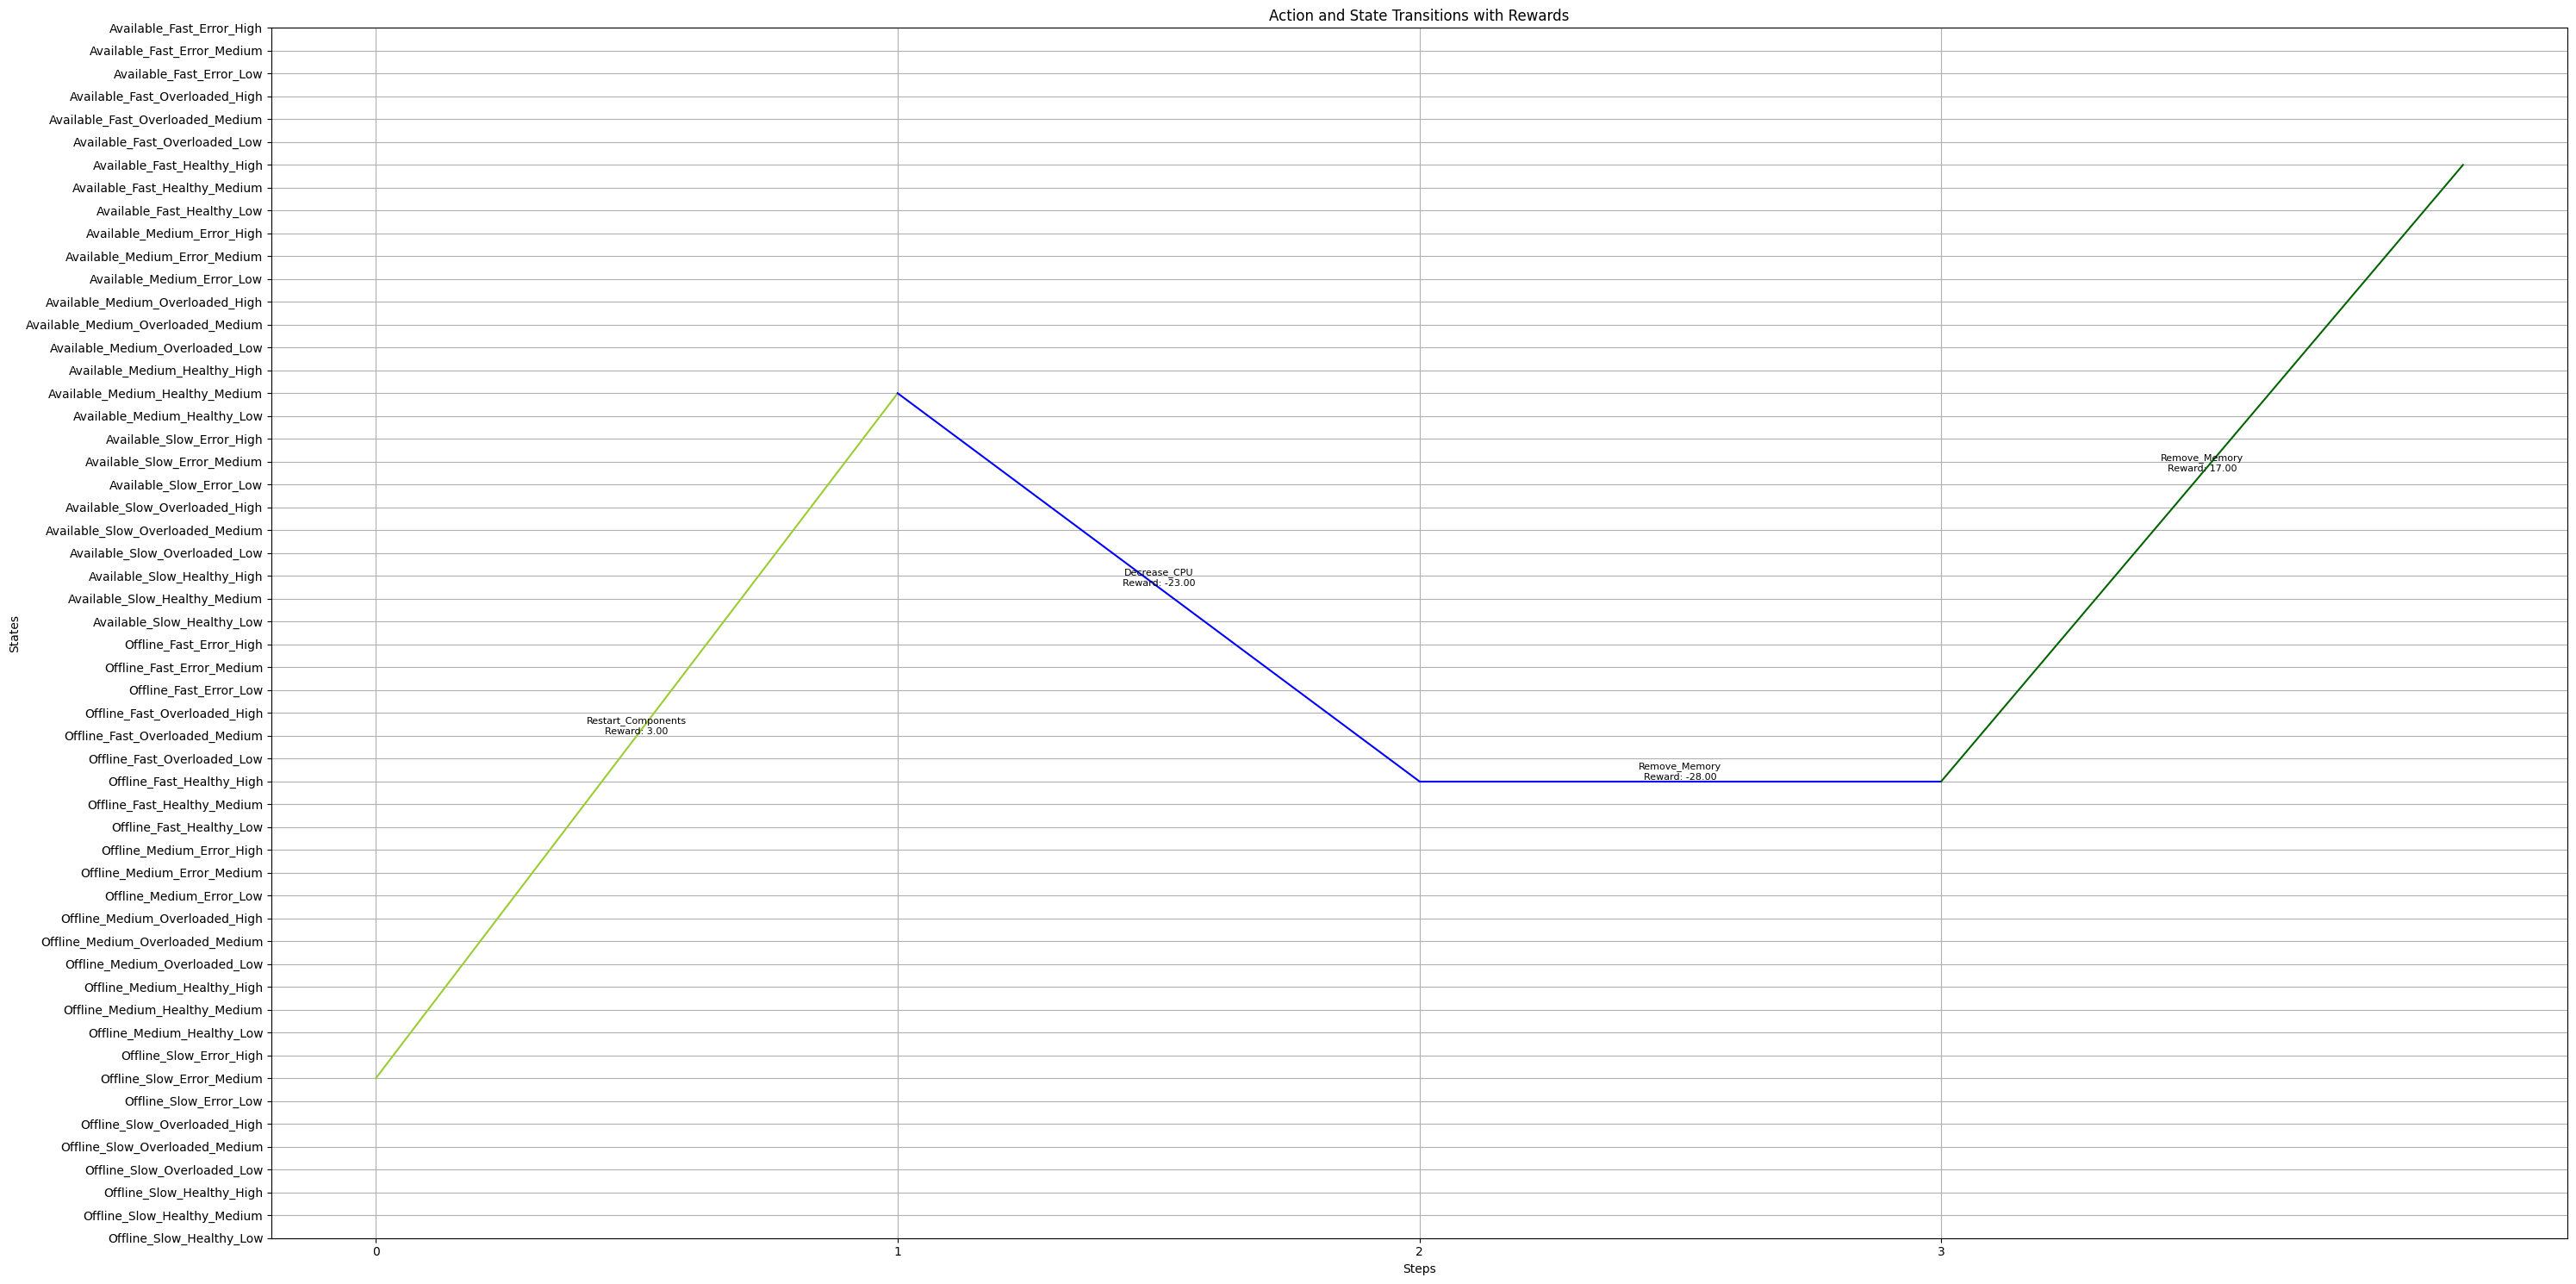

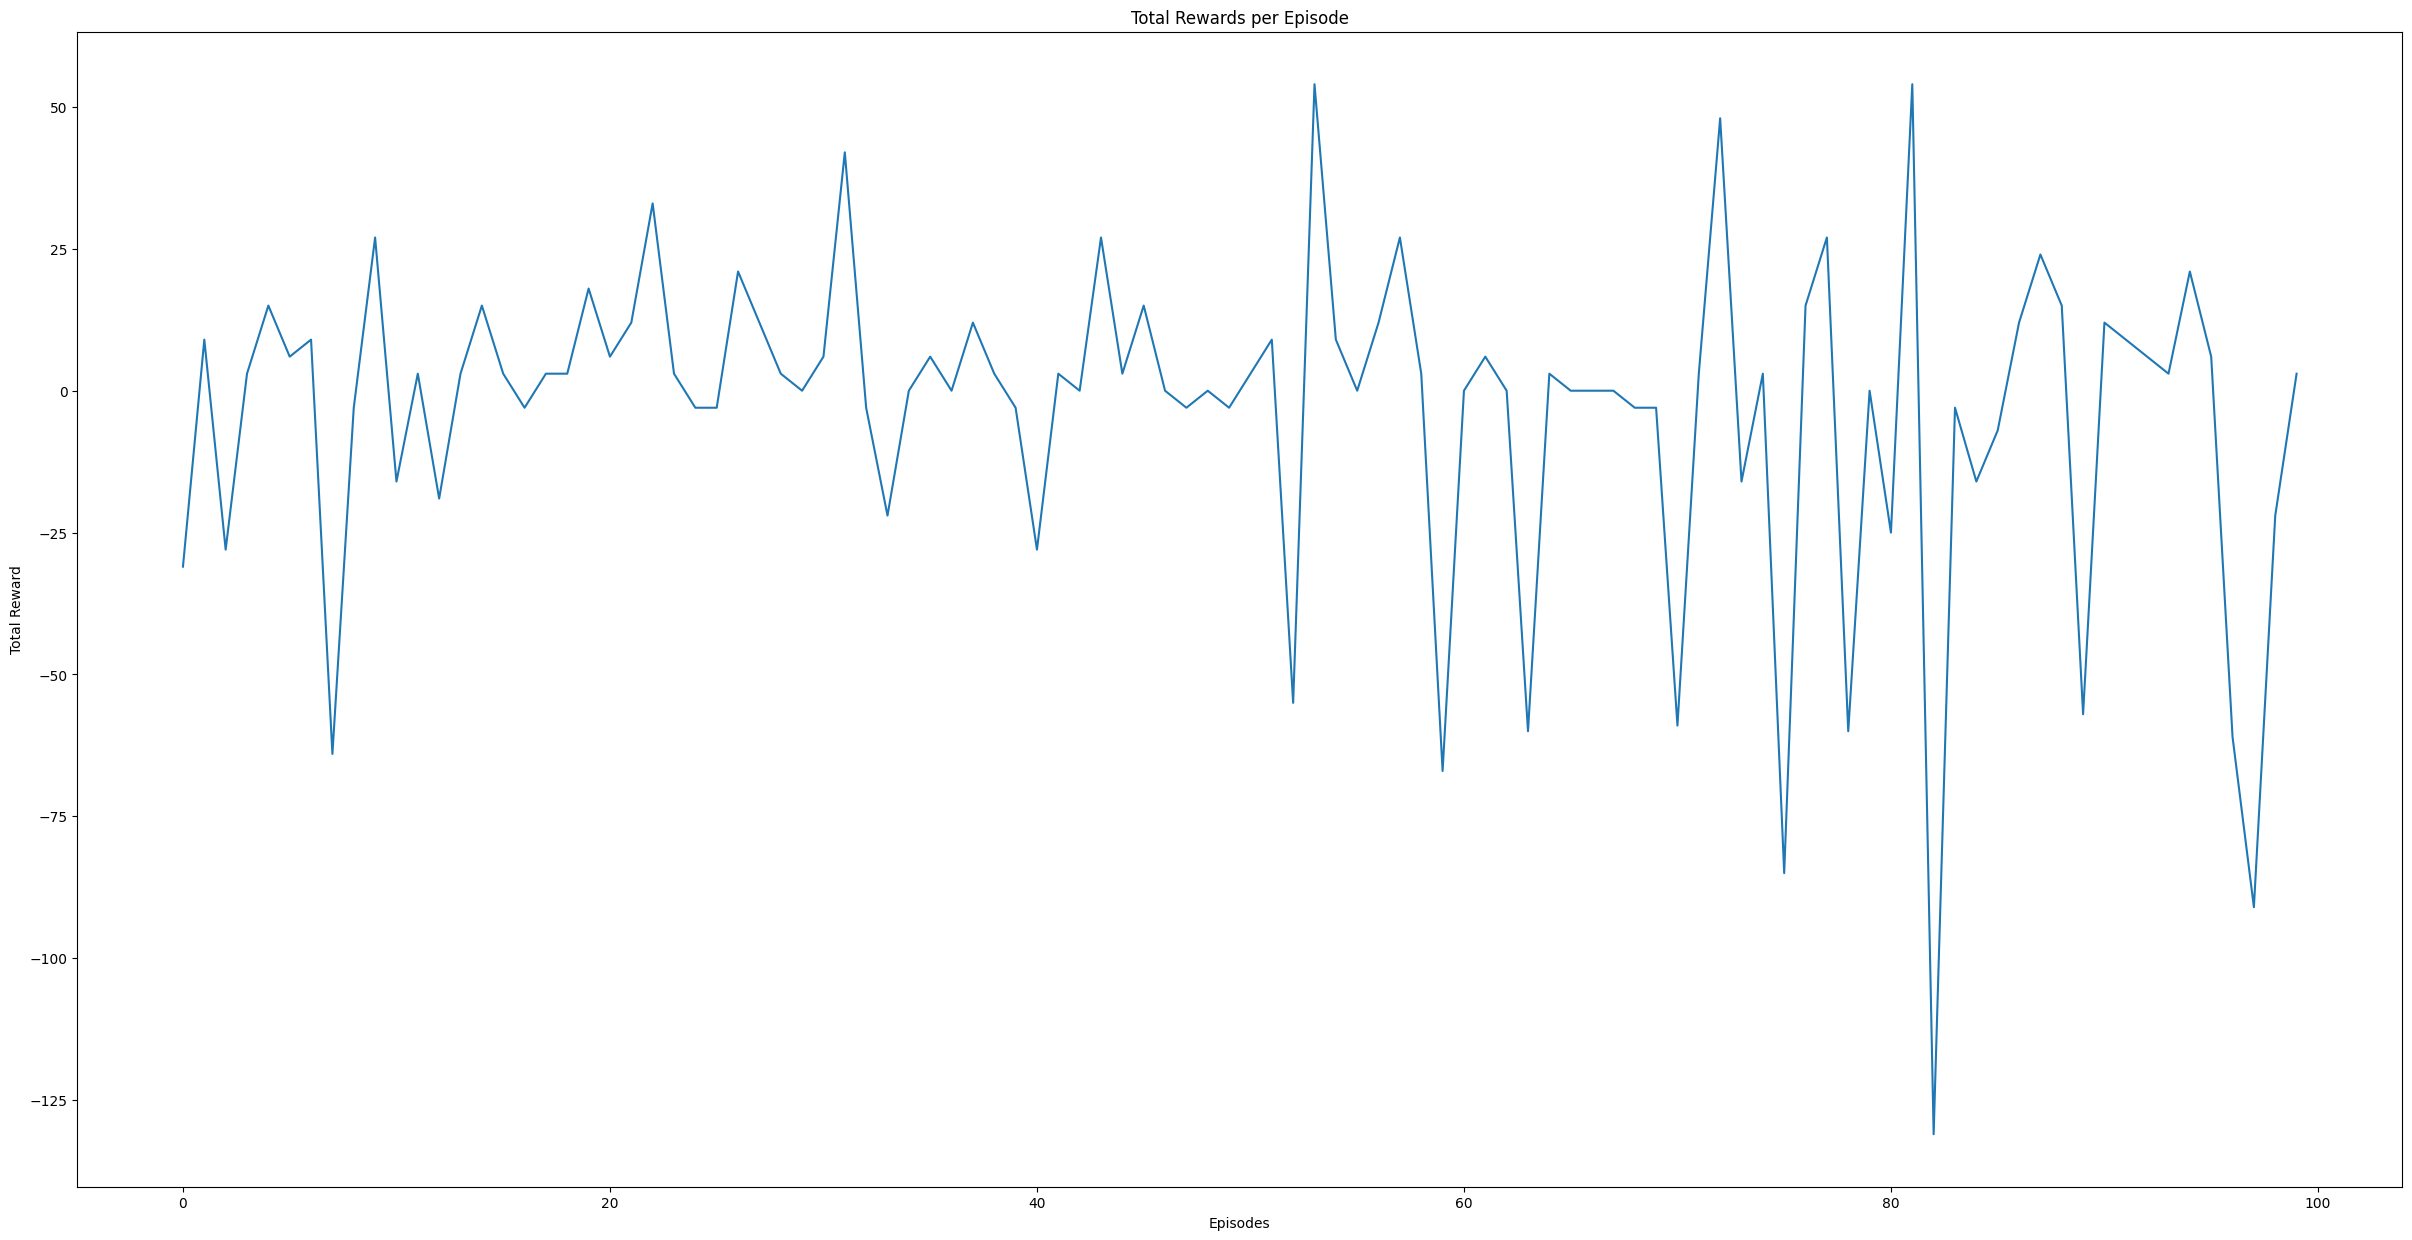

In [7]:
# Executando Value Iteration
print("Executando Value Iteration...")
policy_vi, _ = value_iteration(env, theta=0.000001, discount_factor=0.9)
histories_vi, rewards_vi, total_rewards_vi = run_policy(env, policy_vi)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_vi[0], rewards_vi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(total_rewards_vi)

### Policy Improvement


In [8]:
env.reset()

(7, {})


Executando Policy Improvement...
Política estável após 4 iterações
Episode 1/100
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=6, Reward=3, Next State=37
Current API state: Available_Slow_Healthy_Low
Step 2: State=37, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 3: State=27, Action=2, Reward=3, Next State=27
Current API state: Offline_Fast_Healthy_High
Step 4: State=27, Action=2, Reward=-23, Next State=20
Current API state: Available_Fast_Healthy_High
Step 5: State=20, Action=10, Reward=17, Next State=47
Episode 2/100
Current API state: Available_Medium_Healthy_Medium
Step 1: State=7, Action=6, Reward=3, Next State=37
Current API state: Available_Slow_Healthy_Low
Step 2: State=37, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 3: State=27, Action=2, Reward=3, Next State=27
Current API state: Available_Slow_Healthy_Low
Step 4: State=27, Action=2, Reward=3, Next State=27
Current AP

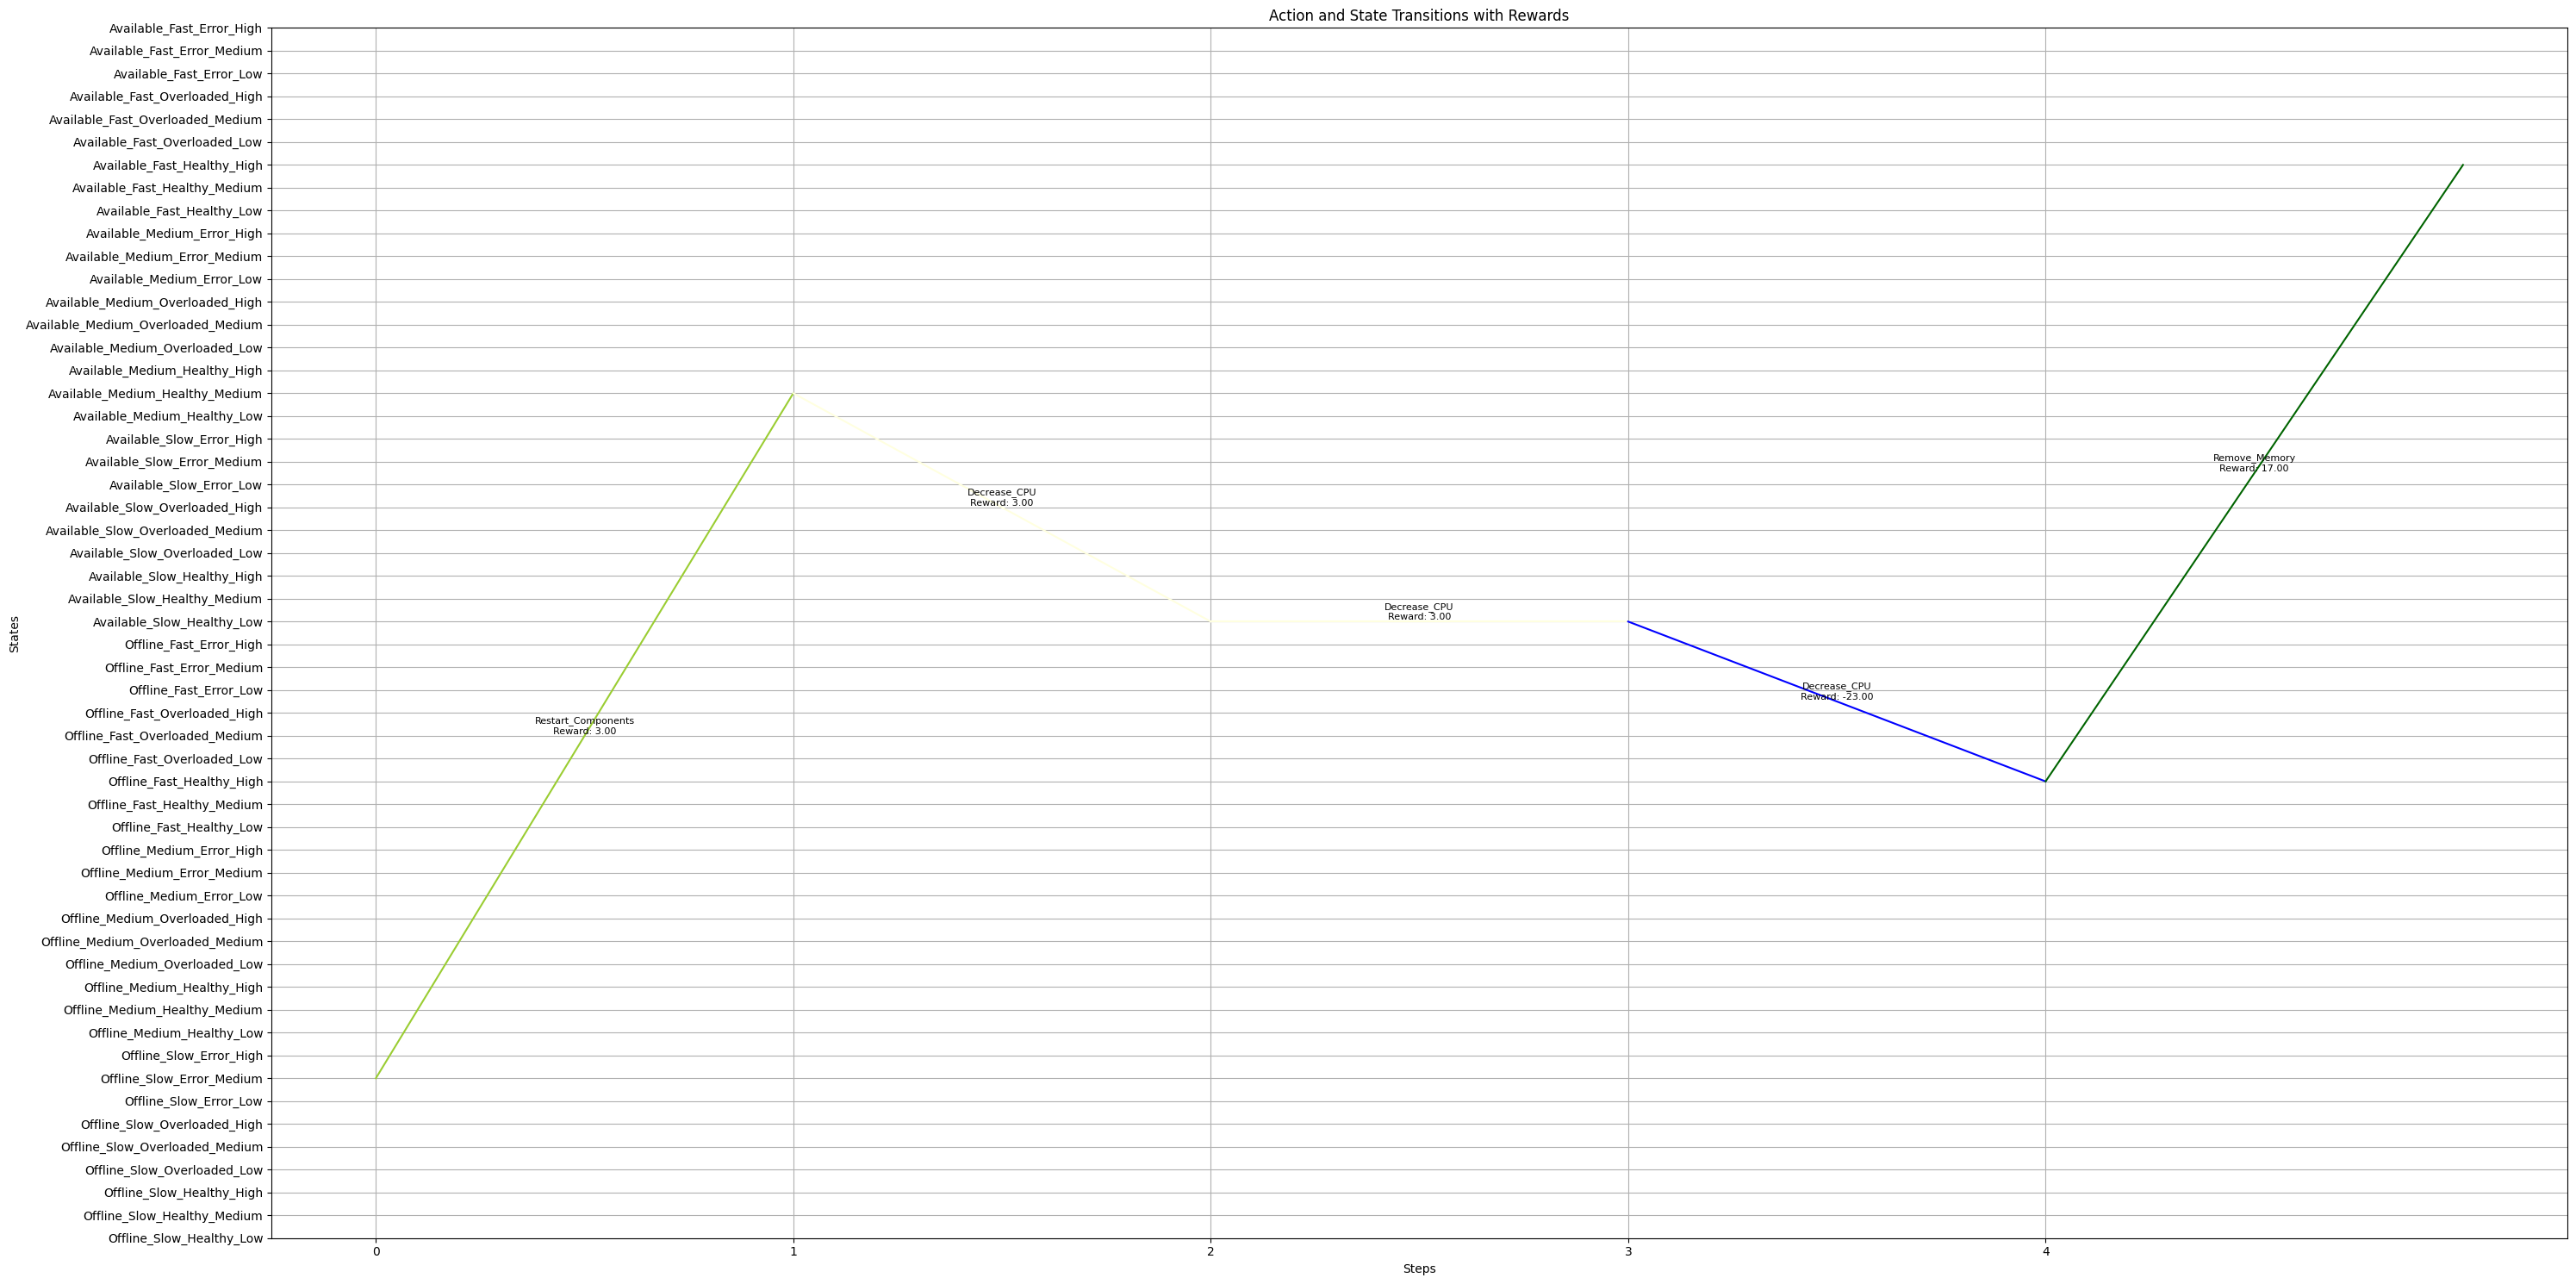

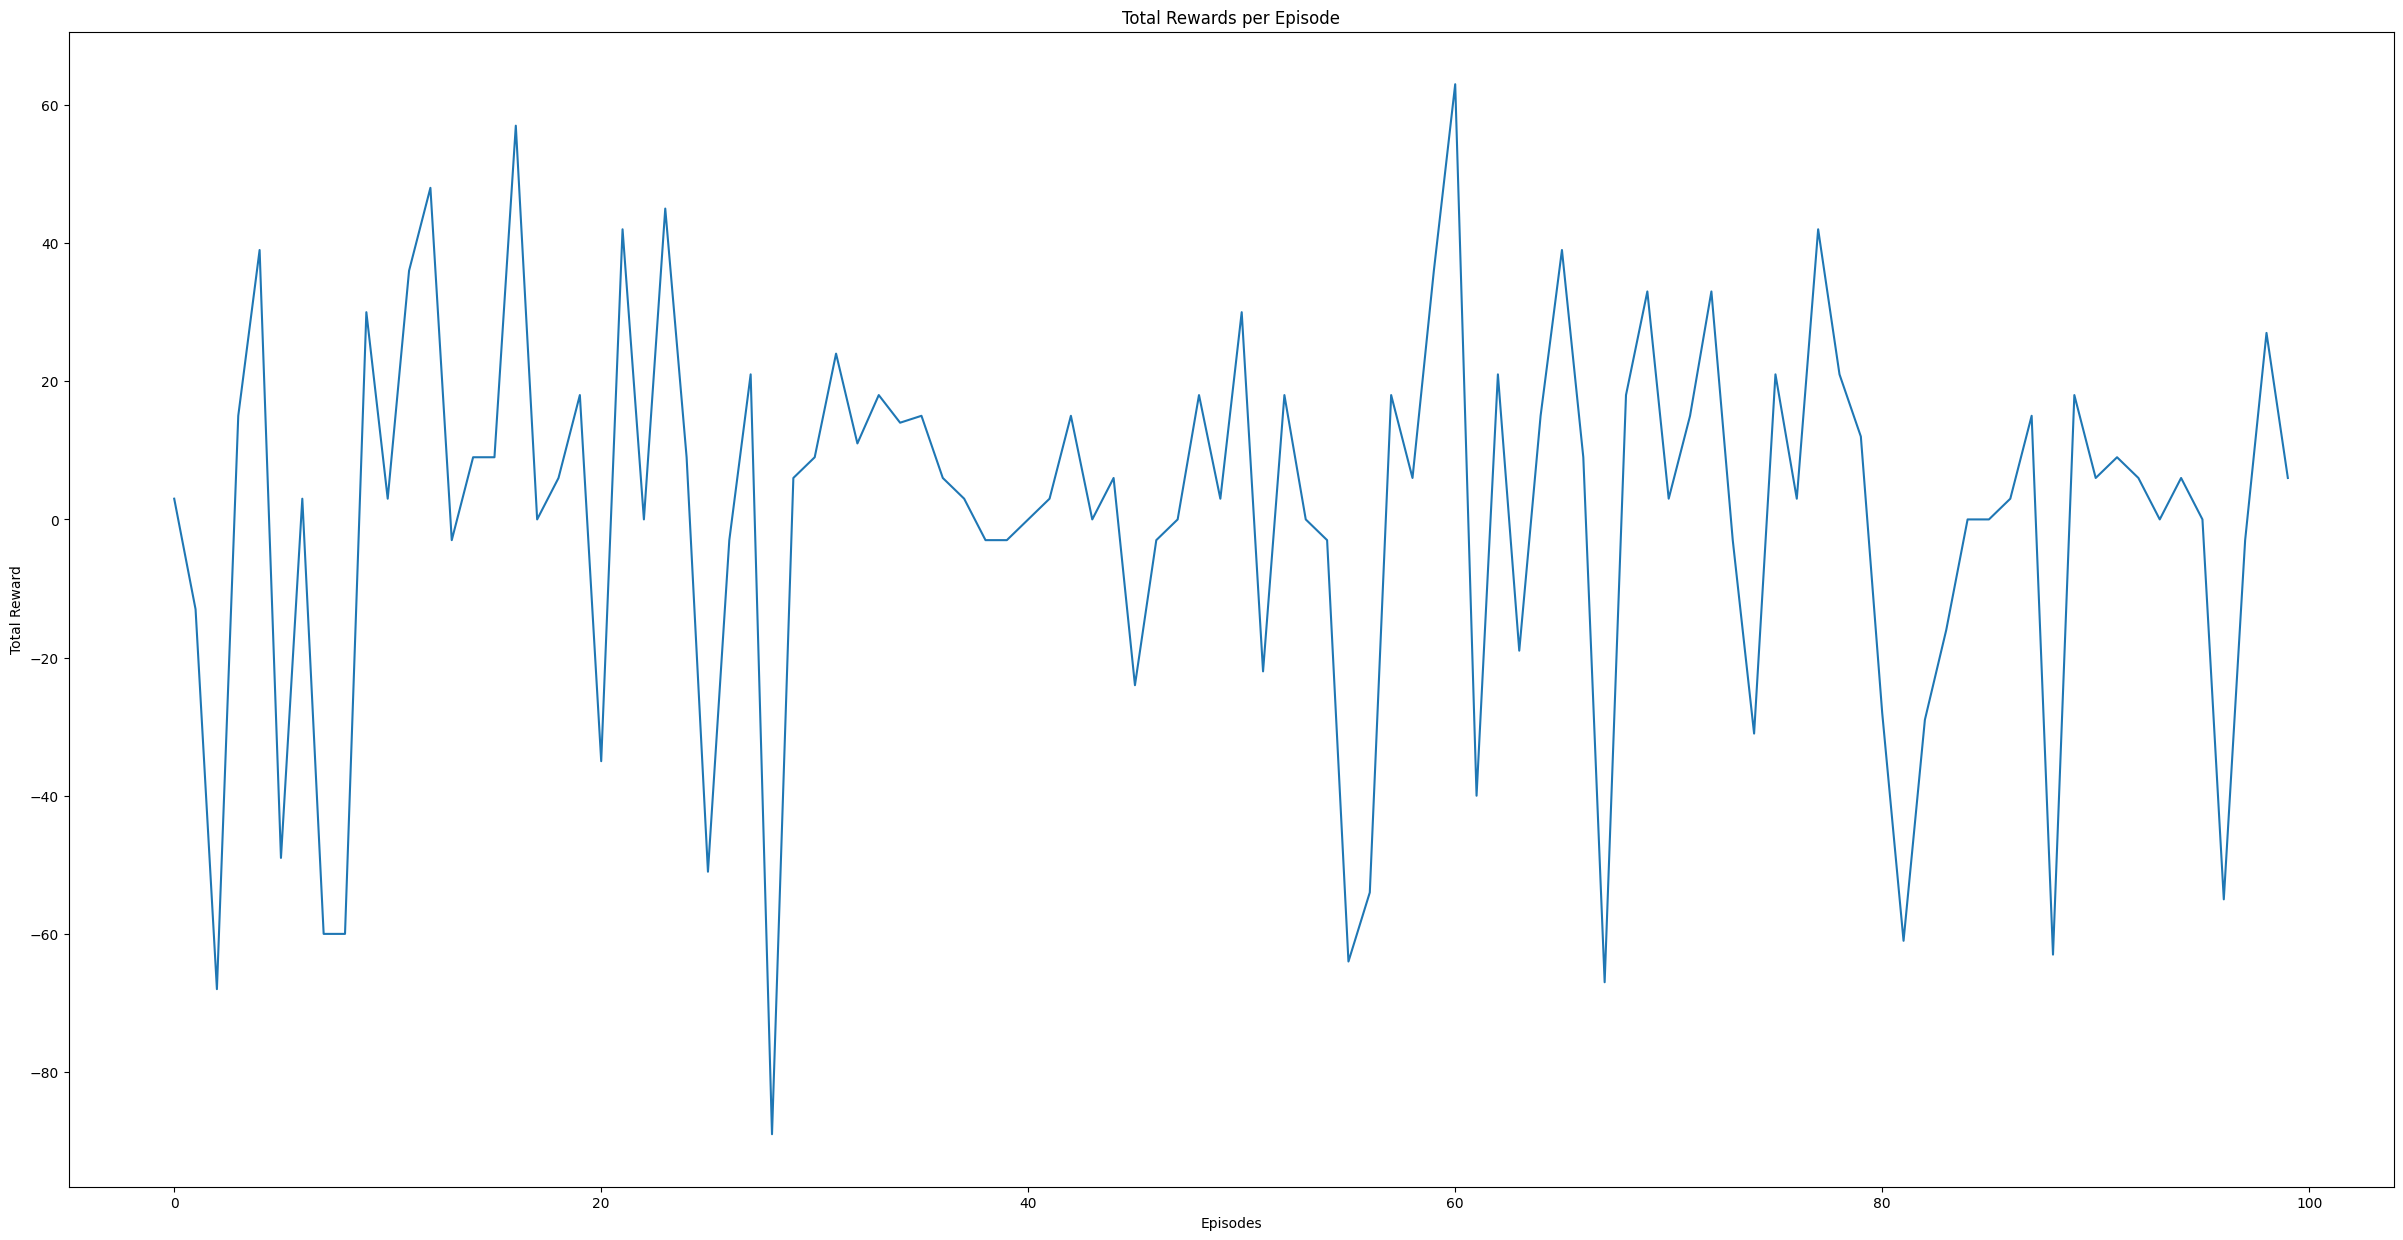

In [9]:
# Executando Policy Improvement e visualizando o progresso
print("\nExecutando Policy Improvement...")
policy_pi, _ = policy_improvement(env)
histories_pi, rewards_pi, total_rewards_pi = run_policy(env, policy_pi)

# Visualizando o histórico e as recompensas do primeiro episódio
plot_action_state_history(histories_pi[0], rewards_pi[0], env)

# Visualizando as recompensas acumuladas em todos os episódios
plot_total_rewards(total_rewards_pi)

## Monte Carlo


In [10]:
from src.algorithms.monte_carlo.utils import (
    plot_action_state_history_with_rewards,
    run_monte_carlo_policy,
)
from src.algorithms.monte_carlo.epsilon_greedy_control import mc_control_epsilon_greedy

In [11]:
env.reset()

(7, {})

In [12]:
num_episodes = 100  # Número de episódios de treinamento
num_steps = 100  # Passos por episódio
discount_factor = 0.99
epsilon = 0.1


Executando Monte Carlo Control...


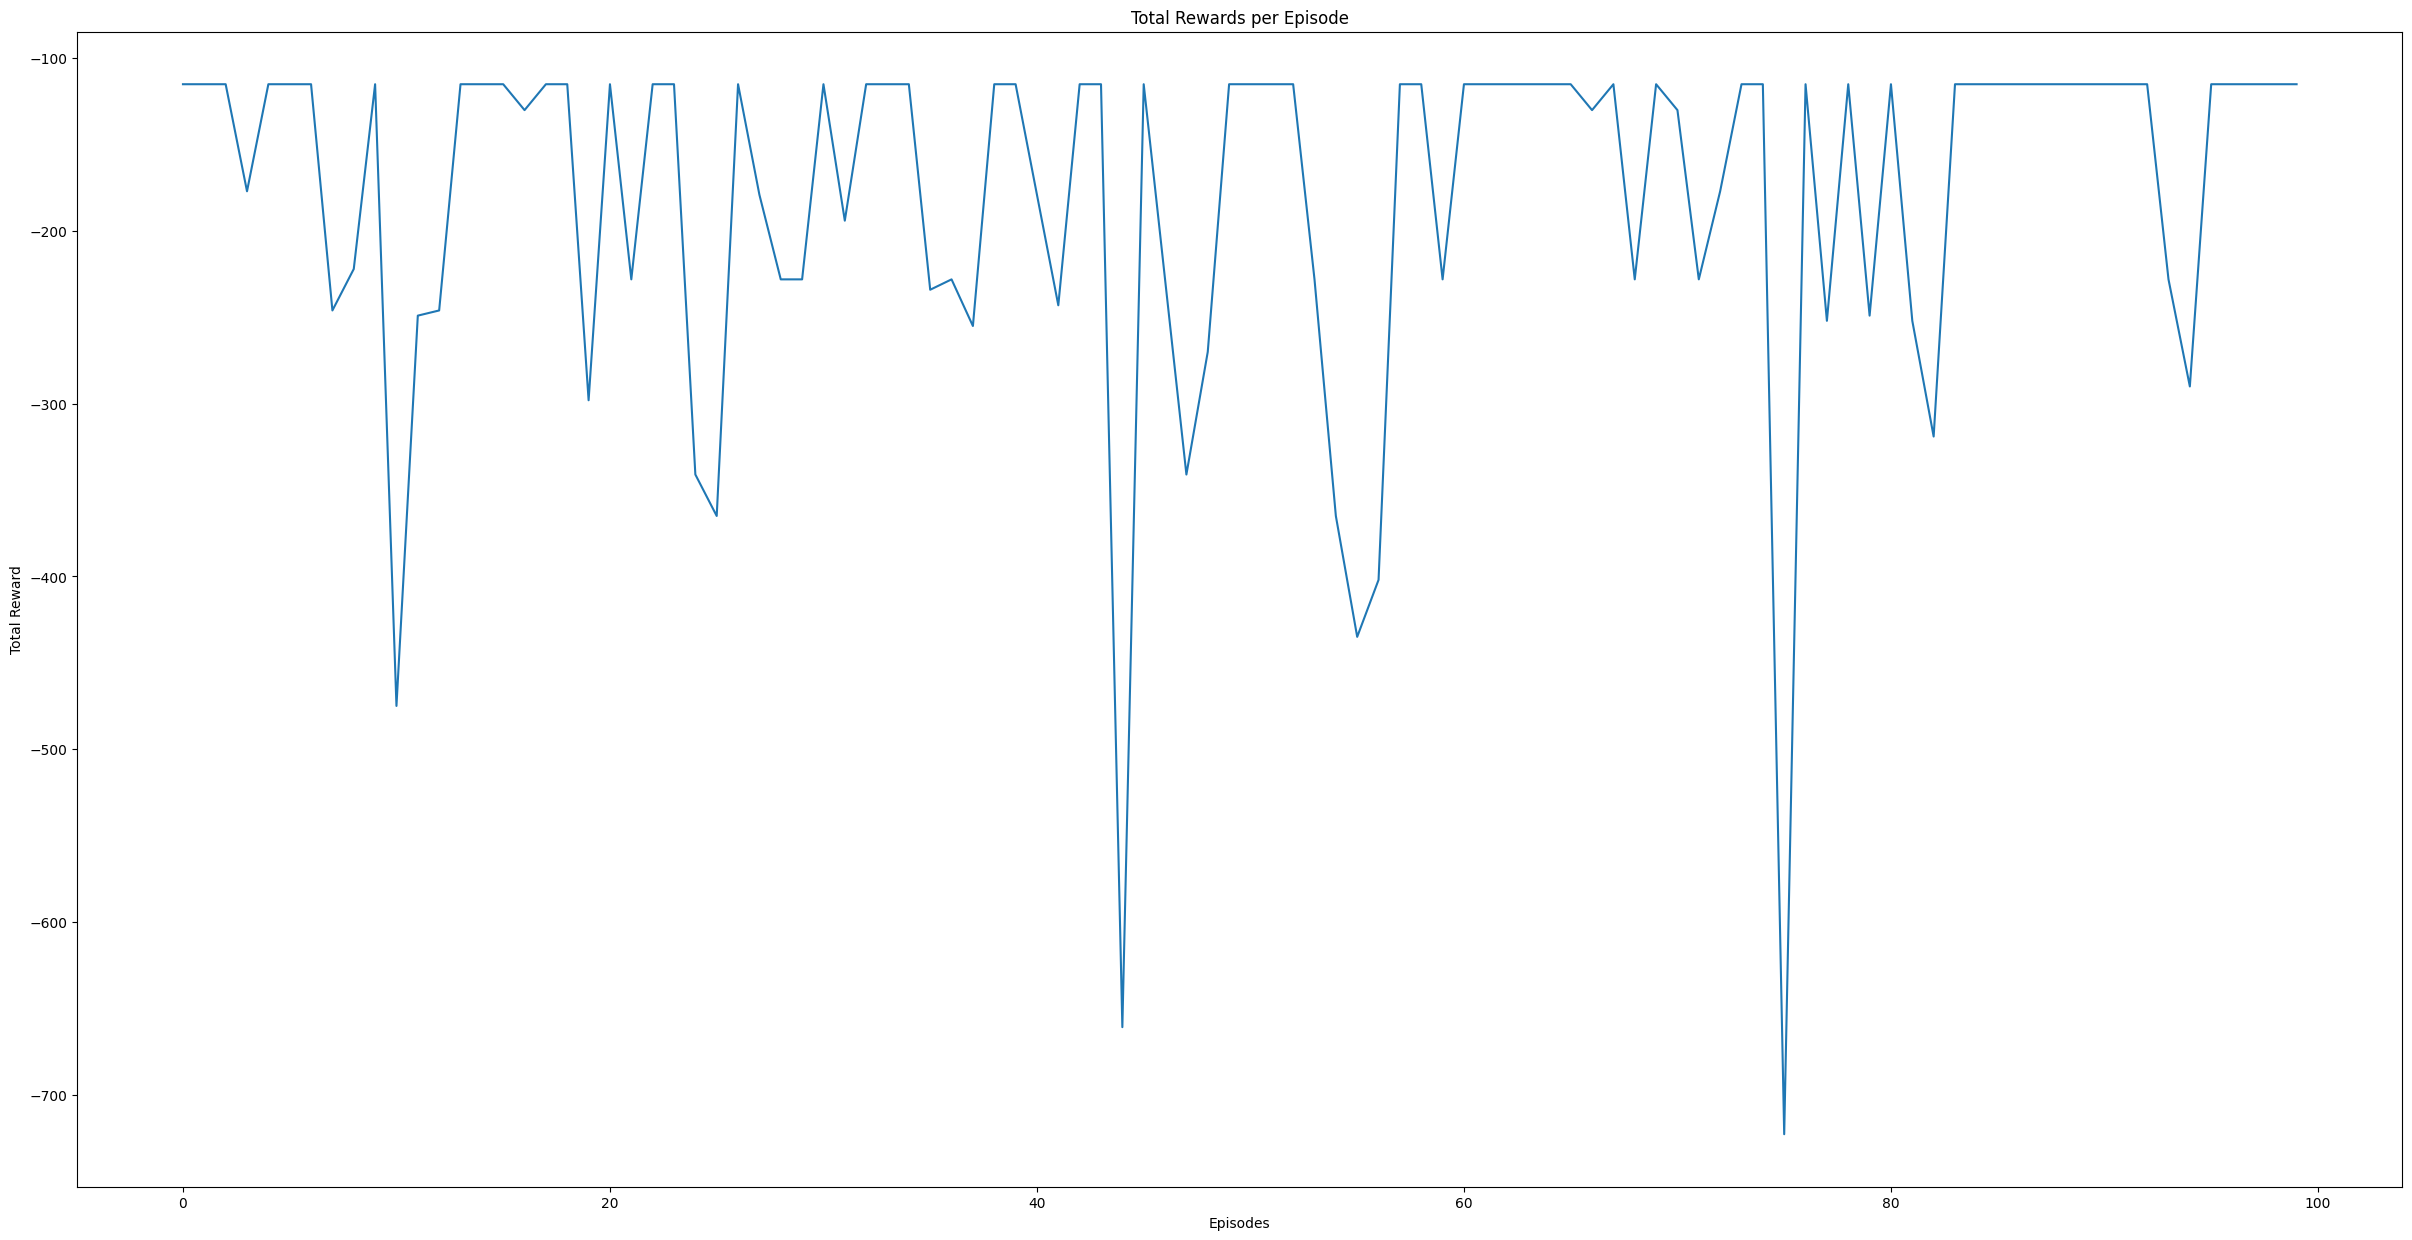

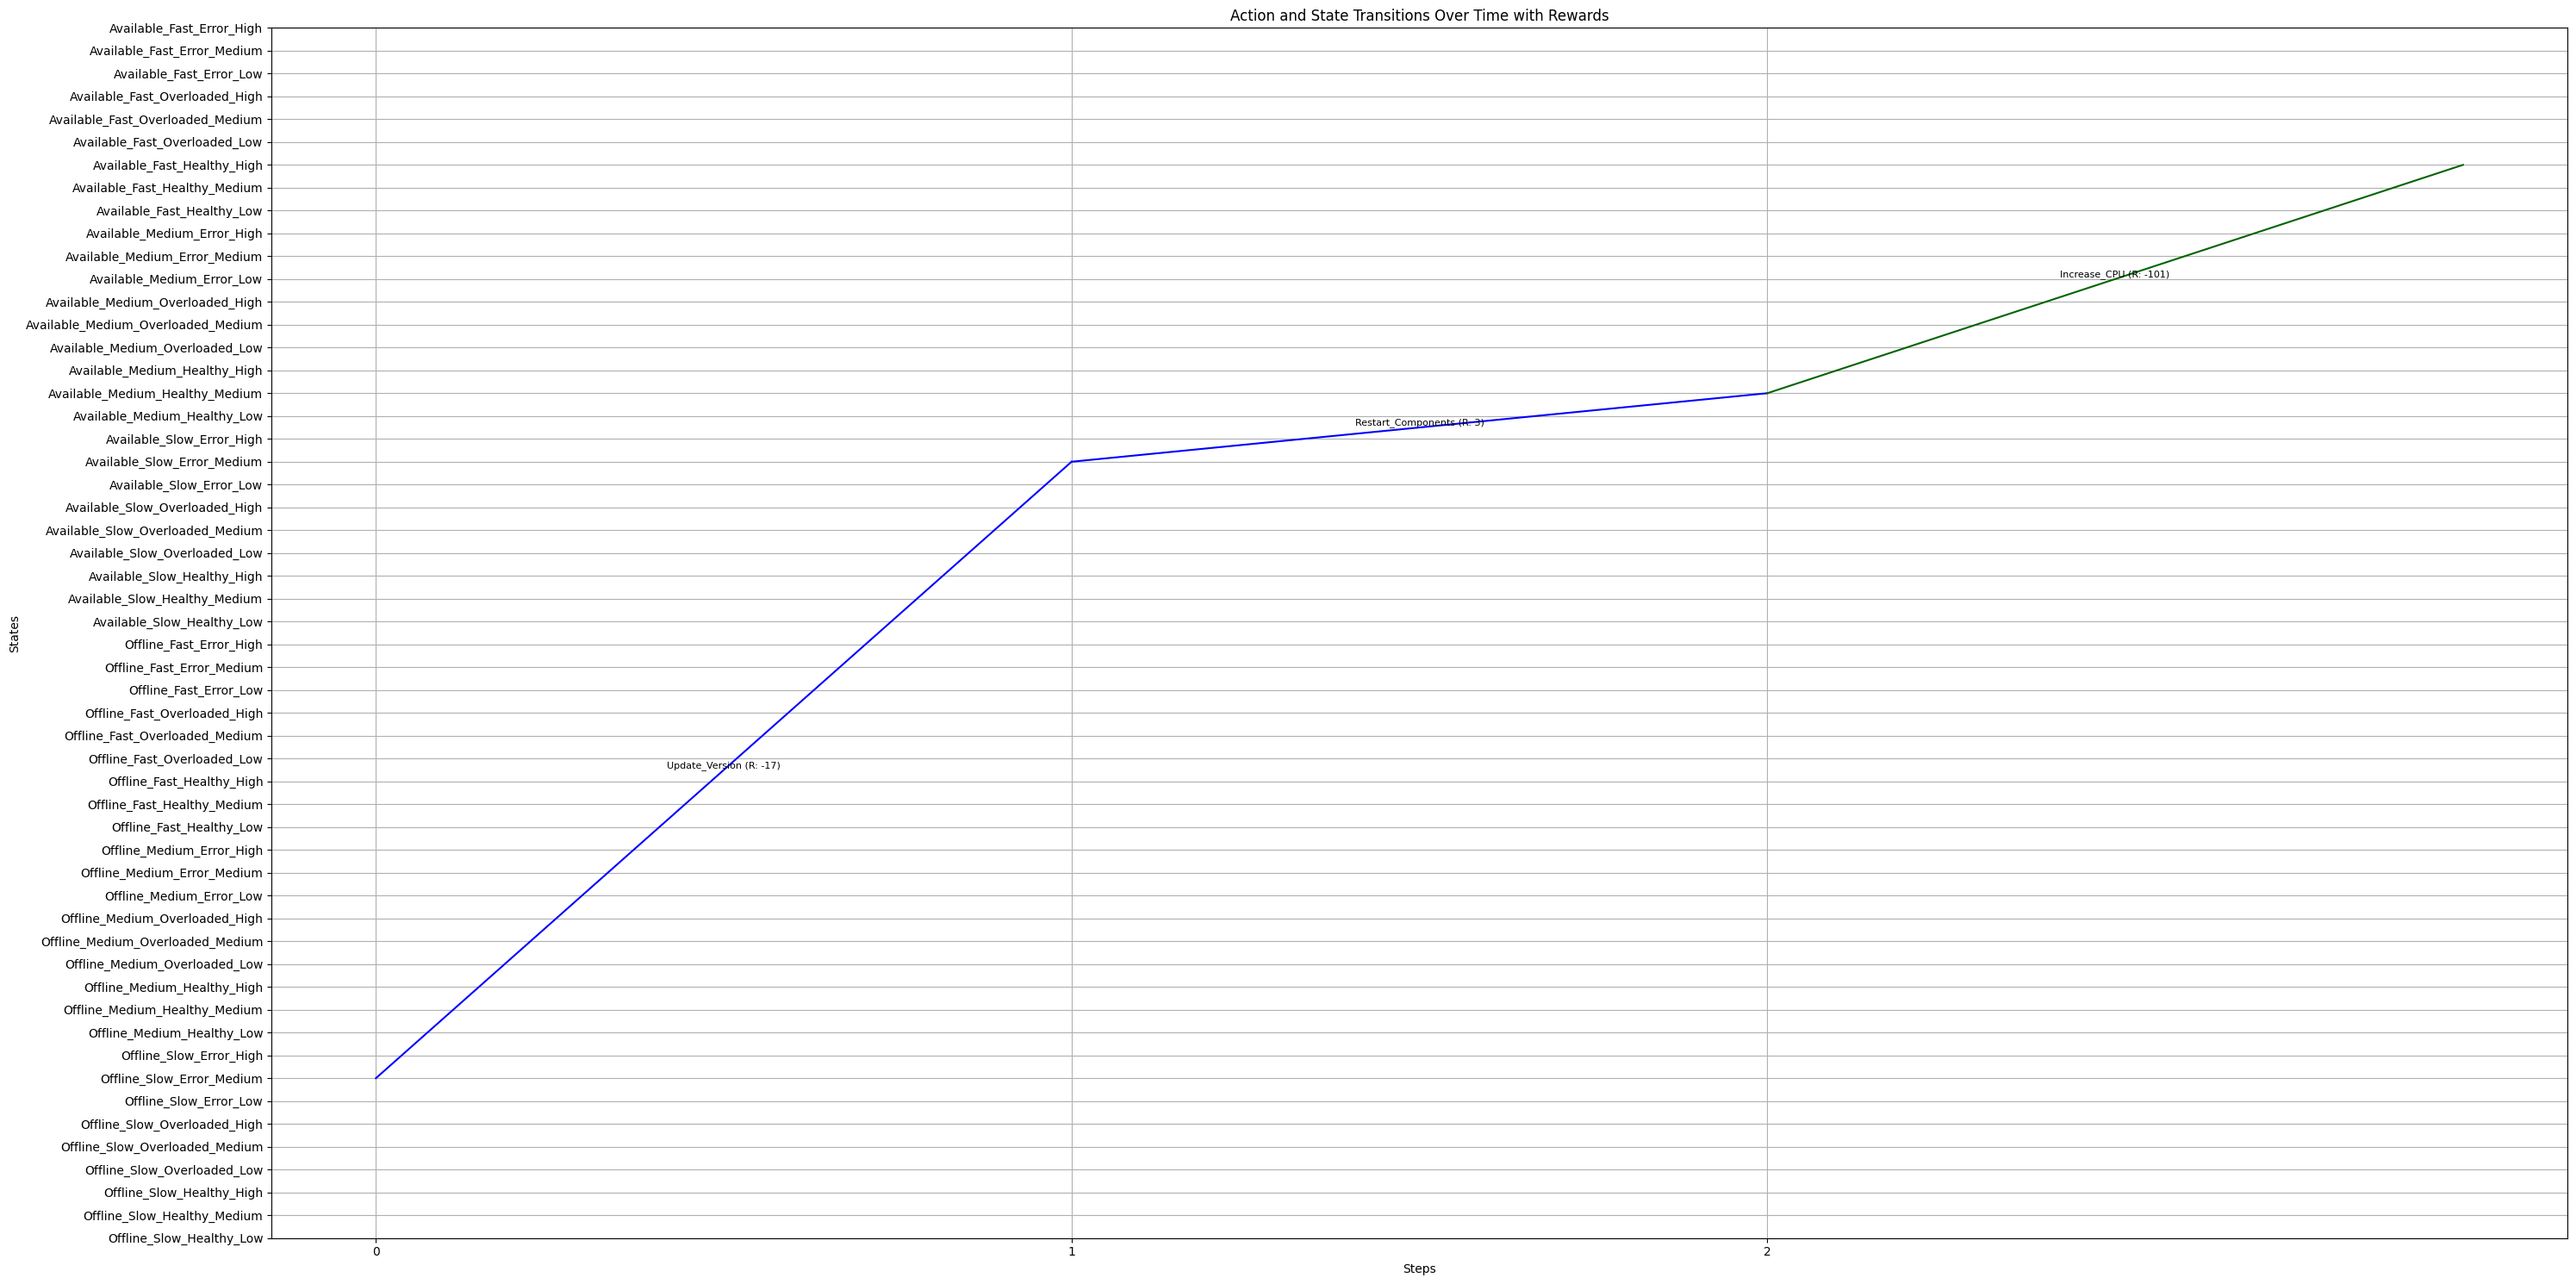

In [13]:
print("\nExecutando Monte Carlo Control...")
Q_mc, policy_mc = mc_control_epsilon_greedy(env, num_episodes, discount_factor, epsilon)
total_rewards_mc, history_mc = run_monte_carlo_policy(
    env, policy_mc, num_episodes, num_steps
)

# Exibir recompensas totais por episódio
plot_total_rewards(total_rewards_mc)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_mc, env)

## Temporal Difference


### Q Learning


In [14]:
env.reset()

(7, {})

In [15]:
from src.algorithms.temporal_difference.q_learning import q_learning
from src.algorithms.temporal_difference.utils import (
    run_q_learning_policy,
    plot_action_state_history,
)

In [16]:
num_episodes = 500  # Número de episódios de treinamento
alpha = 0.1  # Taxa de aprendizado
gamma = 0.99  # Fator de desconto
epsilon = 0.2  # Exploração inicial
epsilon_decay = 0.99  # Decaimento de epsilon ao longo dos episódios


Executando Q-learning...
Episode 0/500 completed.
Episode 100/500 completed.
Episode 200/500 completed.
Episode 300/500 completed.
Episode 400/500 completed.
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Available_Medium_Healthy_Medium
Current API state: Availa

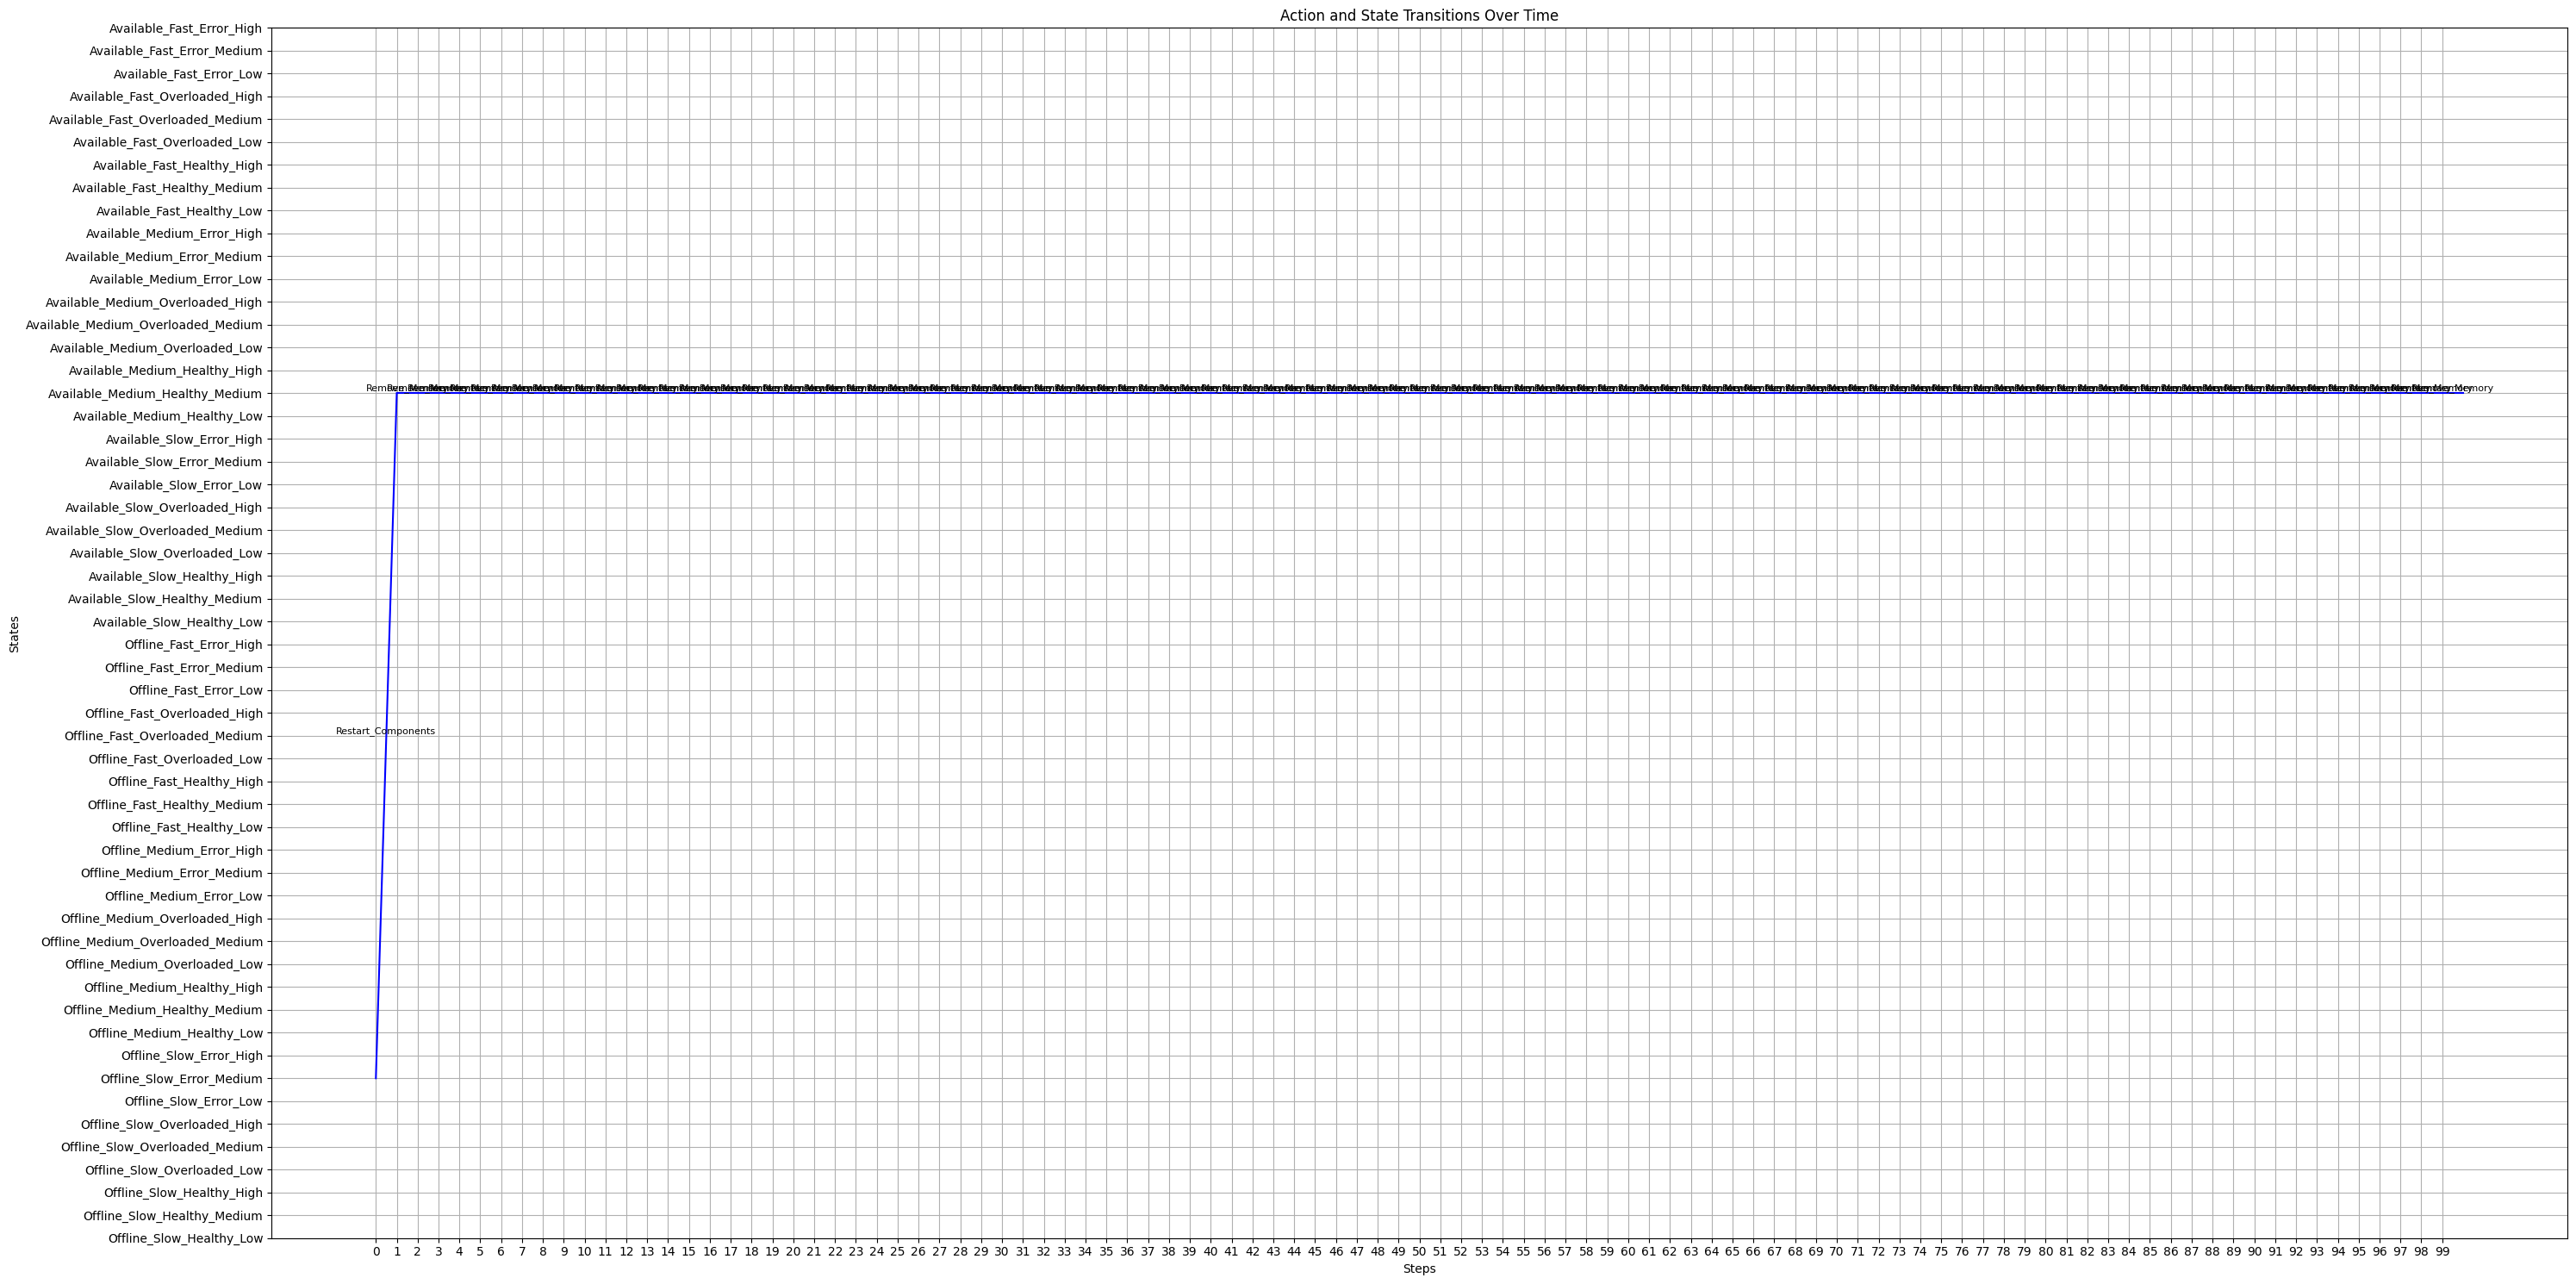

In [17]:
print("\nExecutando Q-learning...")
Q_qlearning, policy_qlearning = q_learning(
    env, num_episodes, alpha, gamma, epsilon, epsilon_decay
)
history_qlearning, rewards_qlearning = run_q_learning_policy(env, policy_qlearning)
plot_action_state_history(history_qlearning, env)

### SARSA


In [18]:
from src.algorithms.temporal_difference.sarsa import sarsa_learning
from src.algorithms.temporal_difference.utils import (
    run_sarsa_policy,
    plot_action_state_history_with_rewards,
)

In [19]:
env.reset()

(7, {})

In [20]:
num_episodes = 500  # Número de episódios de treinamento
num_steps = 100  # Passos por episódio
gamma = 0.99  # Fator de desconto para recompensas futuras
alpha = 0.1  # Taxa de aprendizado para a atualização TD
epsilon = 0.2  # Probabilidade de escolher uma ação aleatória. Float entre 0 e 1 (padrão: 0.1).

Episode 0/500 completed.
Episode 100/500 completed.
Episode 200/500 completed.
Episode 300/500 completed.
Episode 400/500 completed.


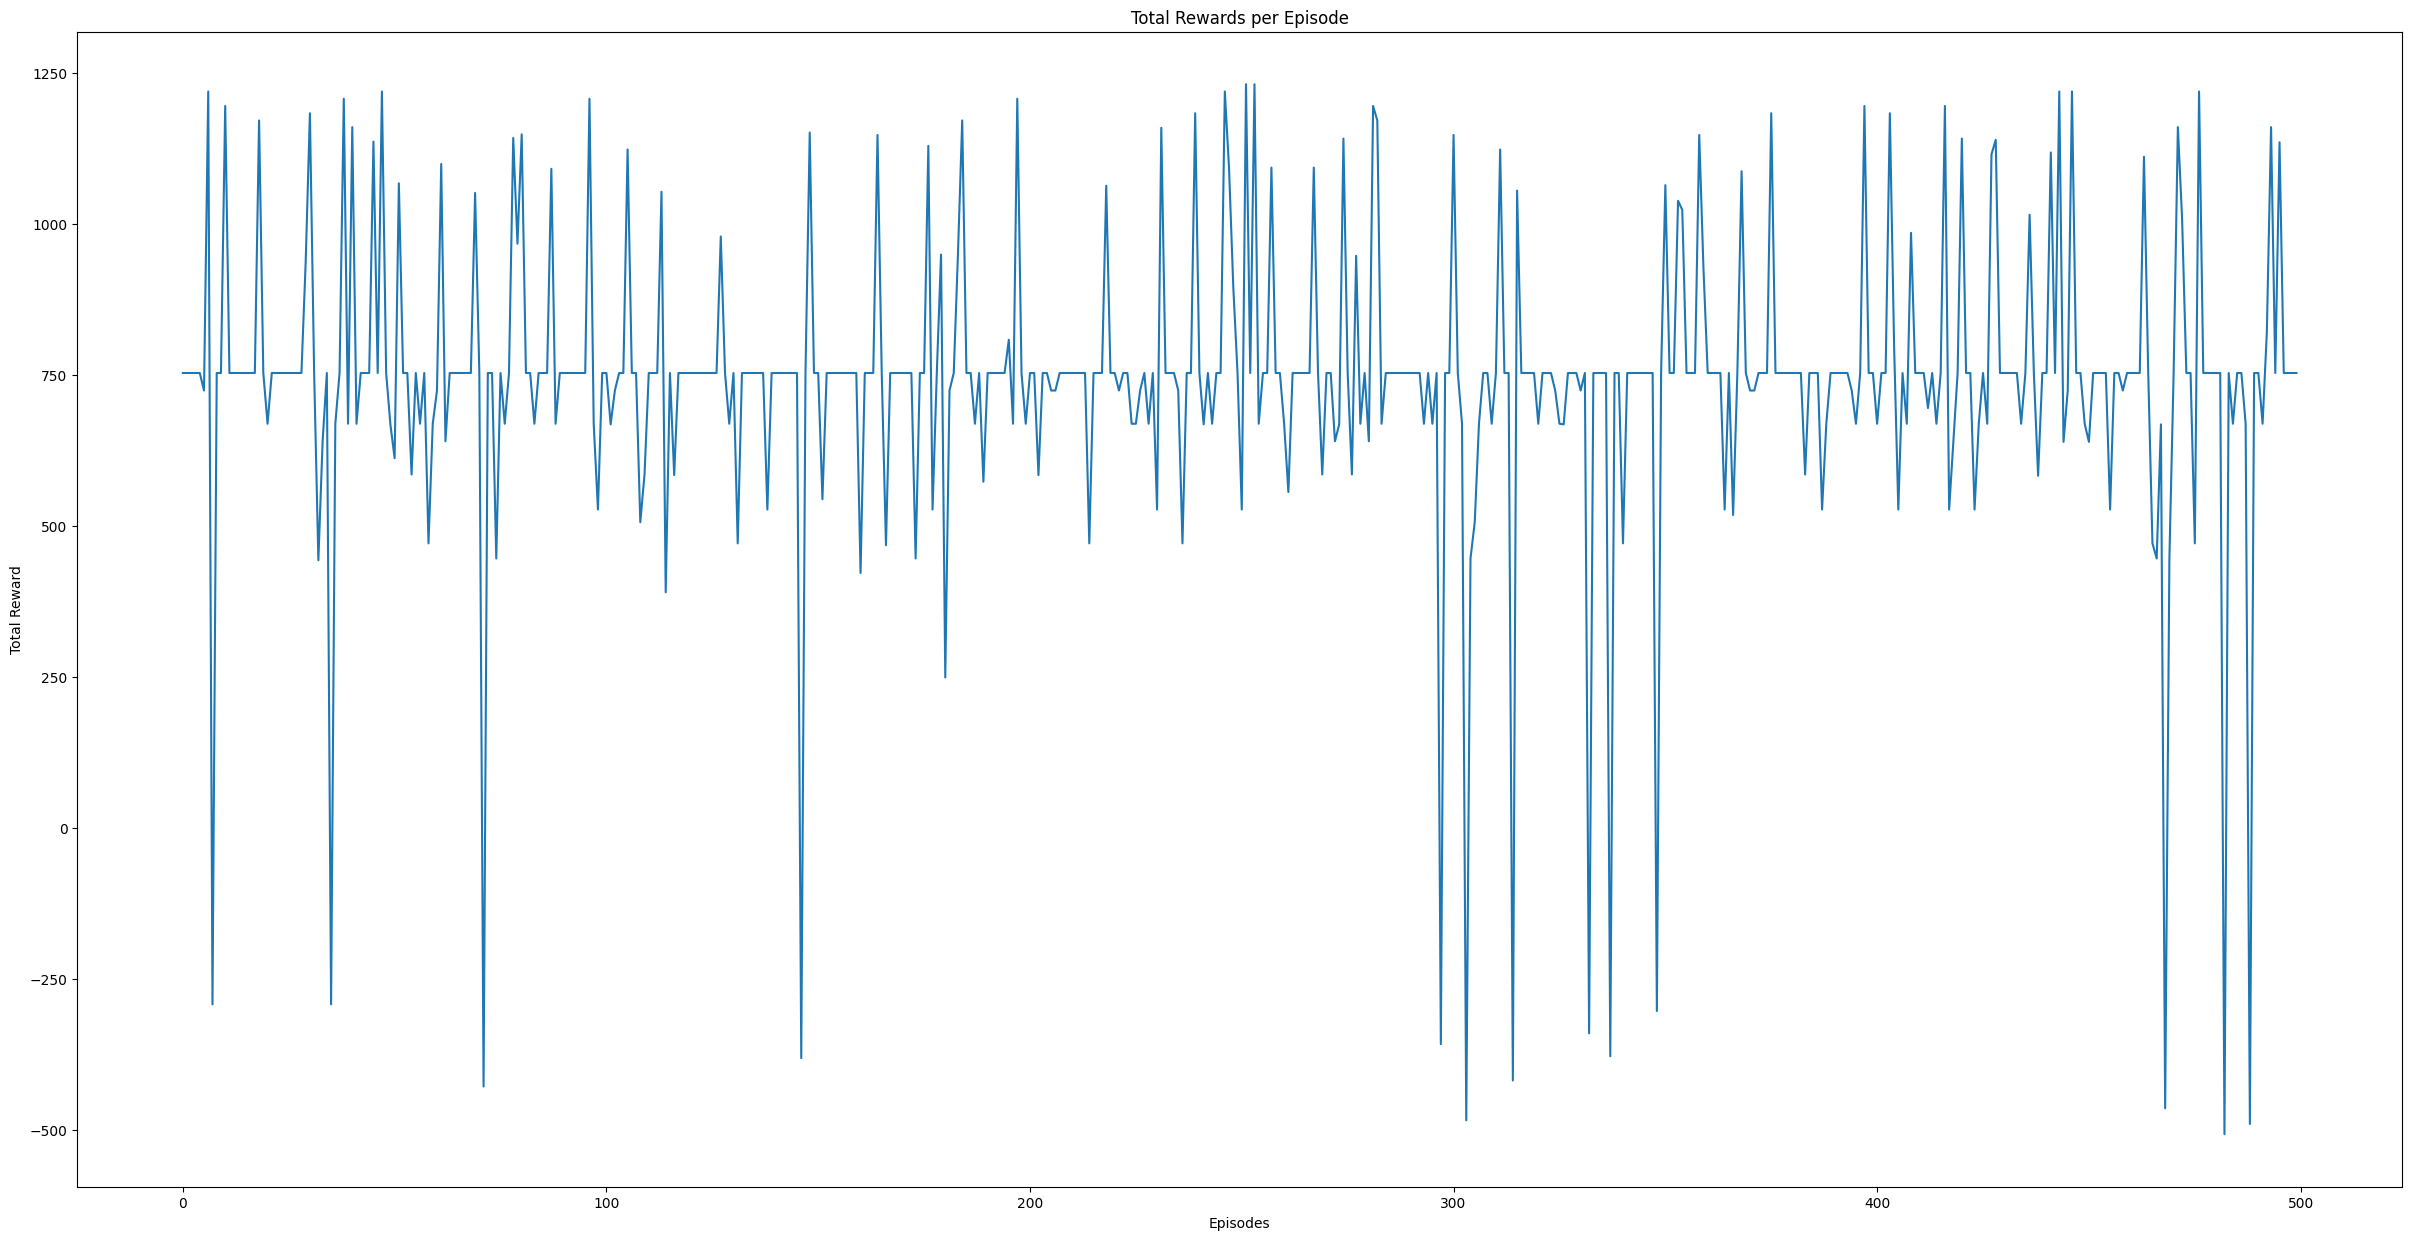

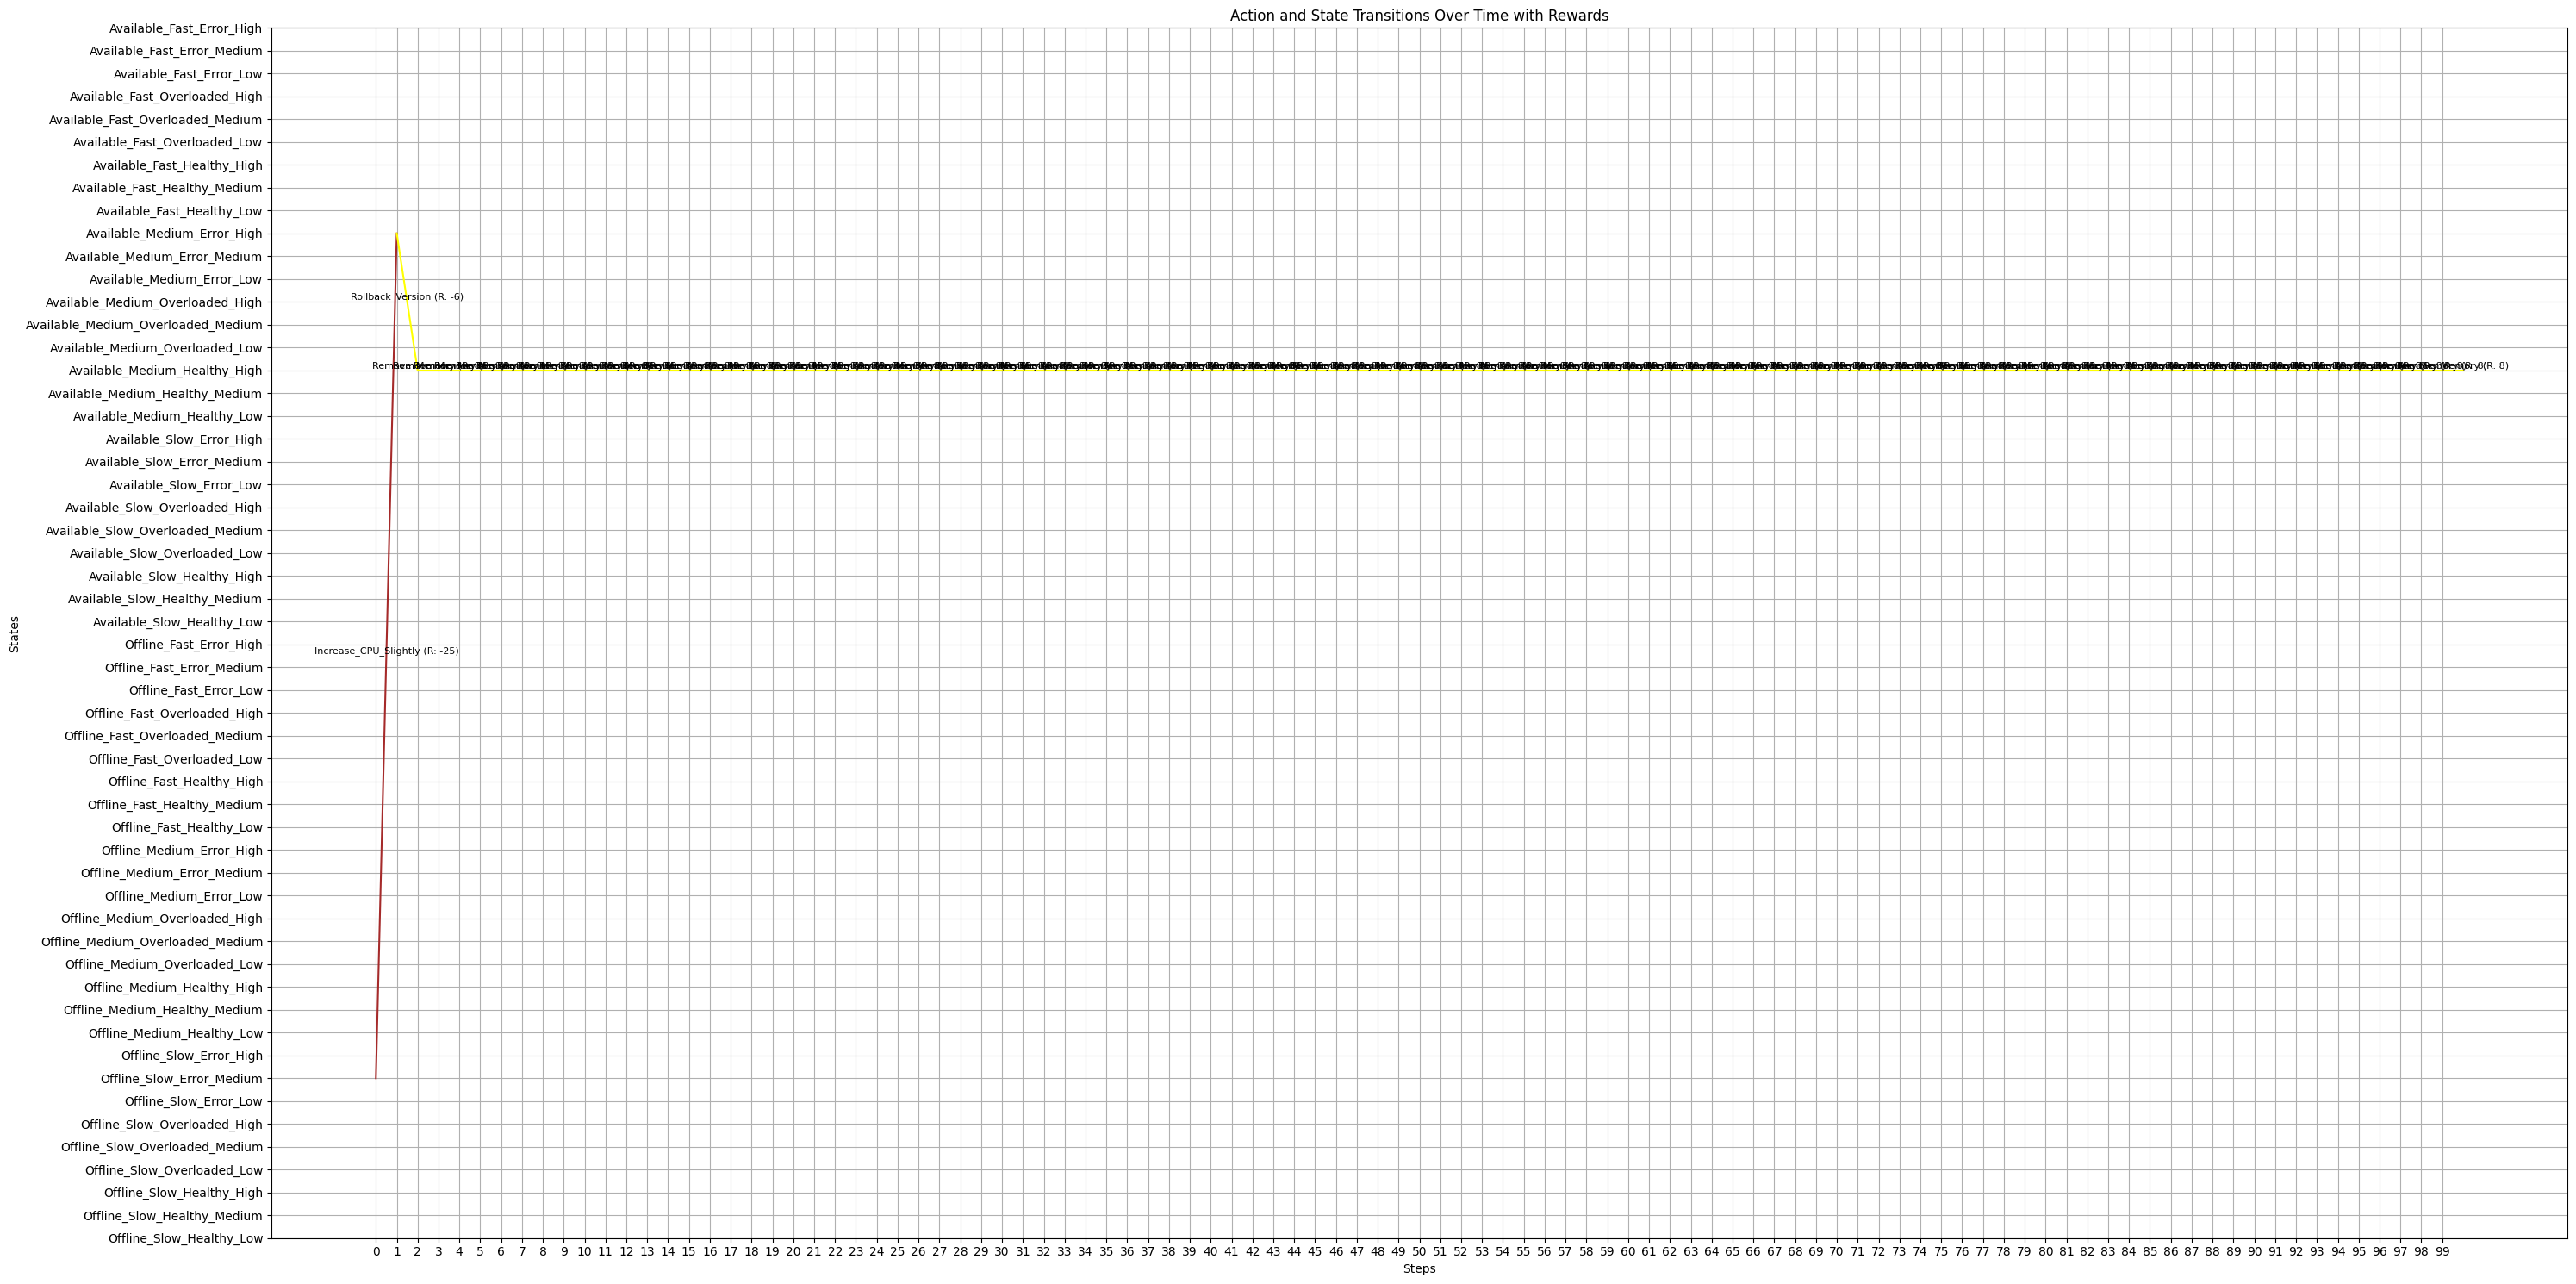

In [21]:
Q_sarsa, policy_sarsa = sarsa_learning(env, num_episodes, gamma, alpha, epsilon)
total_rewards_sarsa, history_sarsa = run_sarsa_policy(
    env, policy_sarsa, num_episodes, num_steps
)

# Exibir recompensas totais por episódio
plot_total_rewards(total_rewards_sarsa)

# Exibir histórico de estados e ações com recompensas
plot_action_state_history_with_rewards(history_sarsa, env)